Distância entre média e mediana (Bloco 1): 9.67%


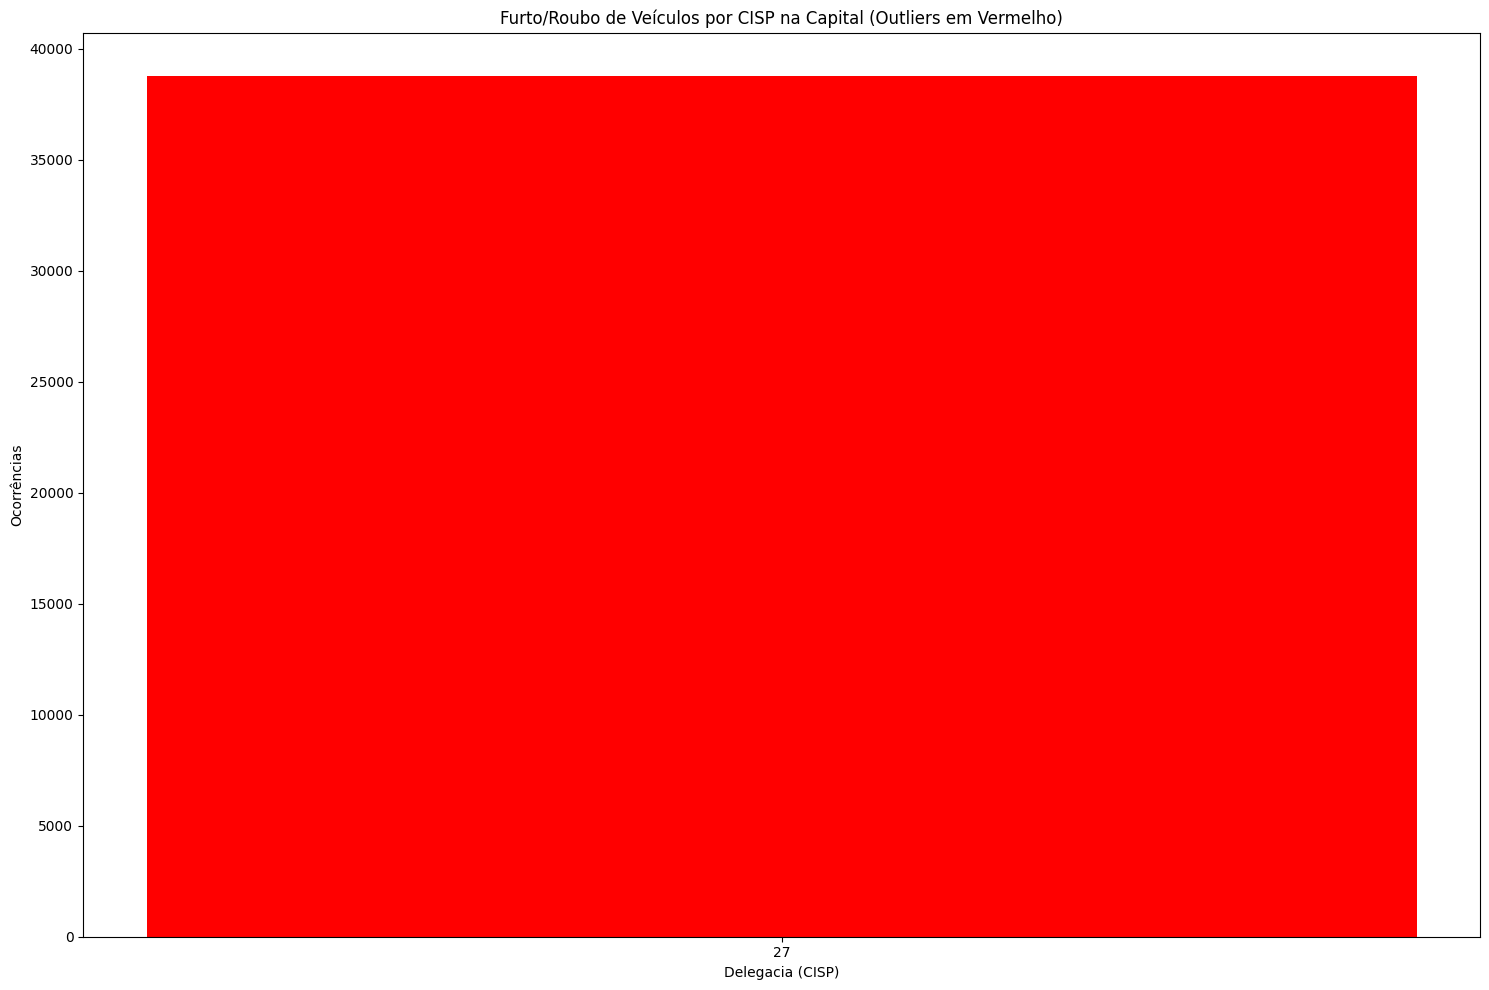

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


url = 'https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv'
BaseDP = pd.read_csv(url, sep=';', encoding='latin1')


capital = BaseDP[BaseDP['munic'] == 'Rio de Janeiro'].copy()
capital.loc[:, 'veiculos'] = capital['furto_veiculos'] + capital['roubo_veiculo']
grupo_capital = capital.groupby('cisp')['veiculos'].sum().reset_index()

valores = np.array(grupo_capital['veiculos'])
q1 = np.percentile(valores, 25)
q3 = np.percentile(valores, 75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr
media = np.mean(valores)
mediana = np.median(valores)
distancia = (media - mediana) / mediana
print(f'Distância entre média e mediana: {distancia * 100:.2f}%')

outliers = grupo_capital[grupo_capital['veiculos'] > limite_superior]

plt.figure(figsize=(15, 10))
plt.bar(outliers['cisp'].astype(str), outliers['veiculos'], color='red')
plt.title('Furto/Roubo de Veículos por CISP na Capital (Outliers em Vermelho)')
plt.xlabel('Delegacia (CISP)')
plt.ylabel('Ocorrências')
plt.tight_layout()
plt.show()

Distância entre média e mediana: 341.07%


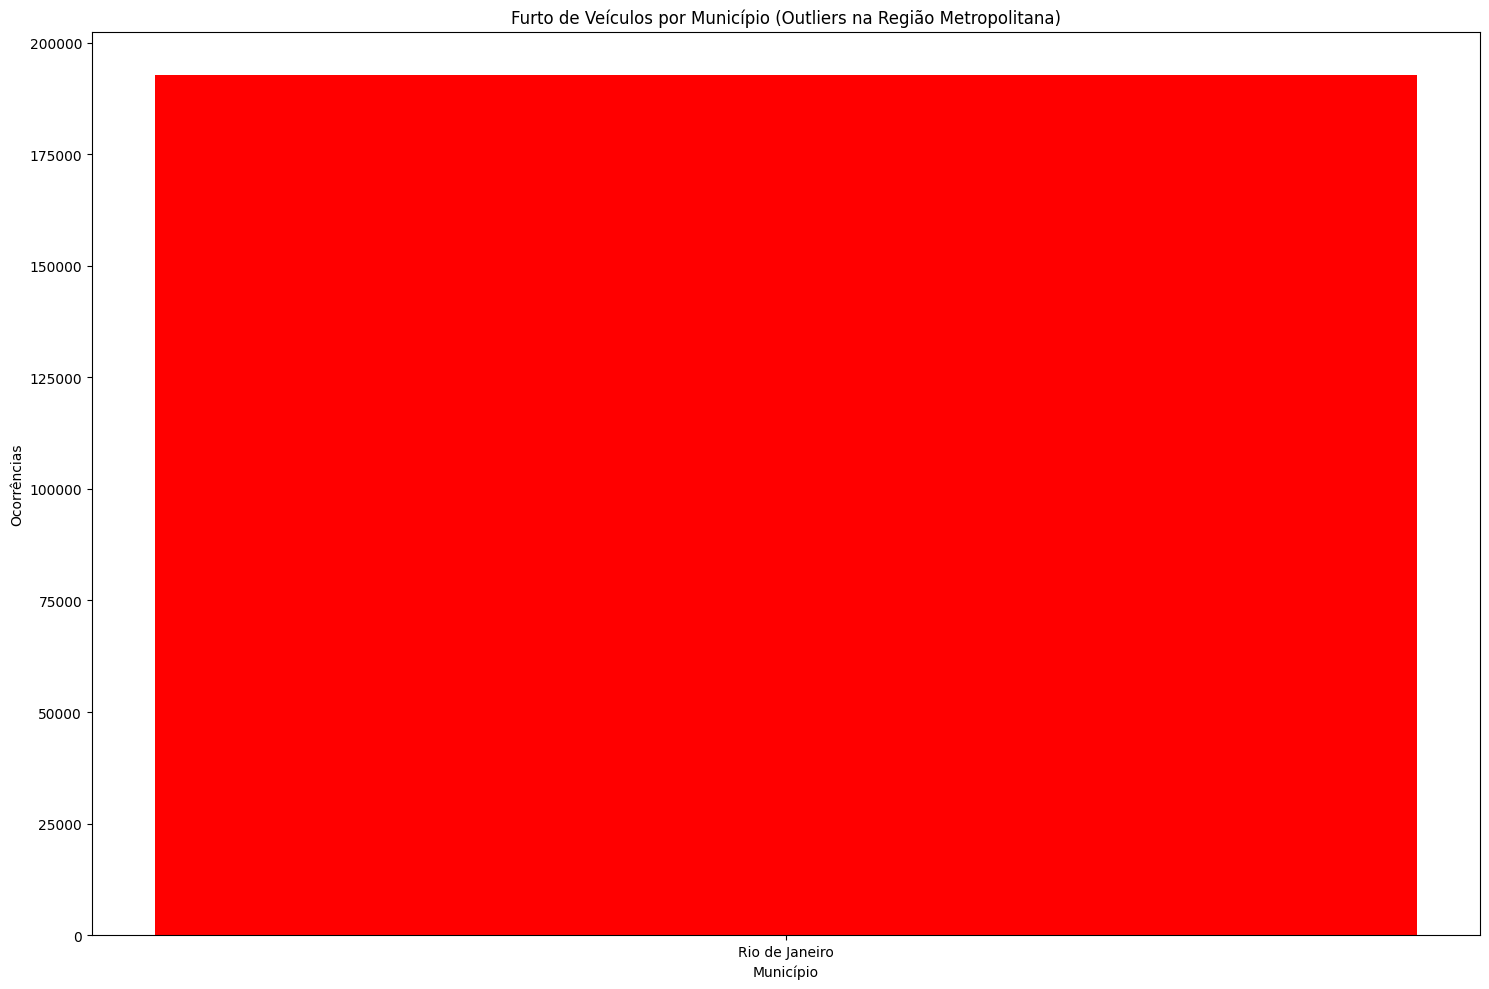

In [4]:

metropolitana = ['Rio de Janeiro', 'Niterói', 'São Gonçalo', 'Duque de Caxias', 'Nova Iguaçu', 'Belford Roxo',
                 'São João de Meriti', 'Mesquita', 'Queimados', 'Itaguaí', 'Magé', 'Guapimirim', 'Japeri',
                 'Seropédica', 'Nilópolis']


furto_mun = BaseDP[BaseDP['munic'].isin(metropolitana)].copy()


grupo_mun = furto_mun.groupby('munic')['furto_veiculos'].sum().reset_index()


valores = np.array(grupo_mun['furto_veiculos'])
q1 = np.percentile(valores, 25)
q3 = np.percentile(valores, 75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr
media_veiculos = np.mean(valores)
mediana_veiculos = np.median(valores)
distancia = (media_veiculos - mediana_veiculos) / mediana_veiculos
print(f'Distância entre média e mediana: {distancia * 100:.2f}%')


outliers_mun = grupo_mun[grupo_mun['furto_veiculos'] > limite_superior]

# Gráfico
plt.figure(figsize=(15, 10))
plt.bar(outliers_mun['munic'], outliers_mun['furto_veiculos'], color='red')
plt.title('Furto de Veículos por Município (Outliers na Região Metropolitana)')
plt.xlabel('Município')
plt.ylabel('Ocorrências')
plt.tight_layout()
plt.show()


Distância entre média e mediana (gestão atual): 24.31%
Distância entre média e mediana (gestão anterior): 27.30%


C:\Users\PC\AppData\Local\Temp\ipykernel_17444\3011781685.py:61: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


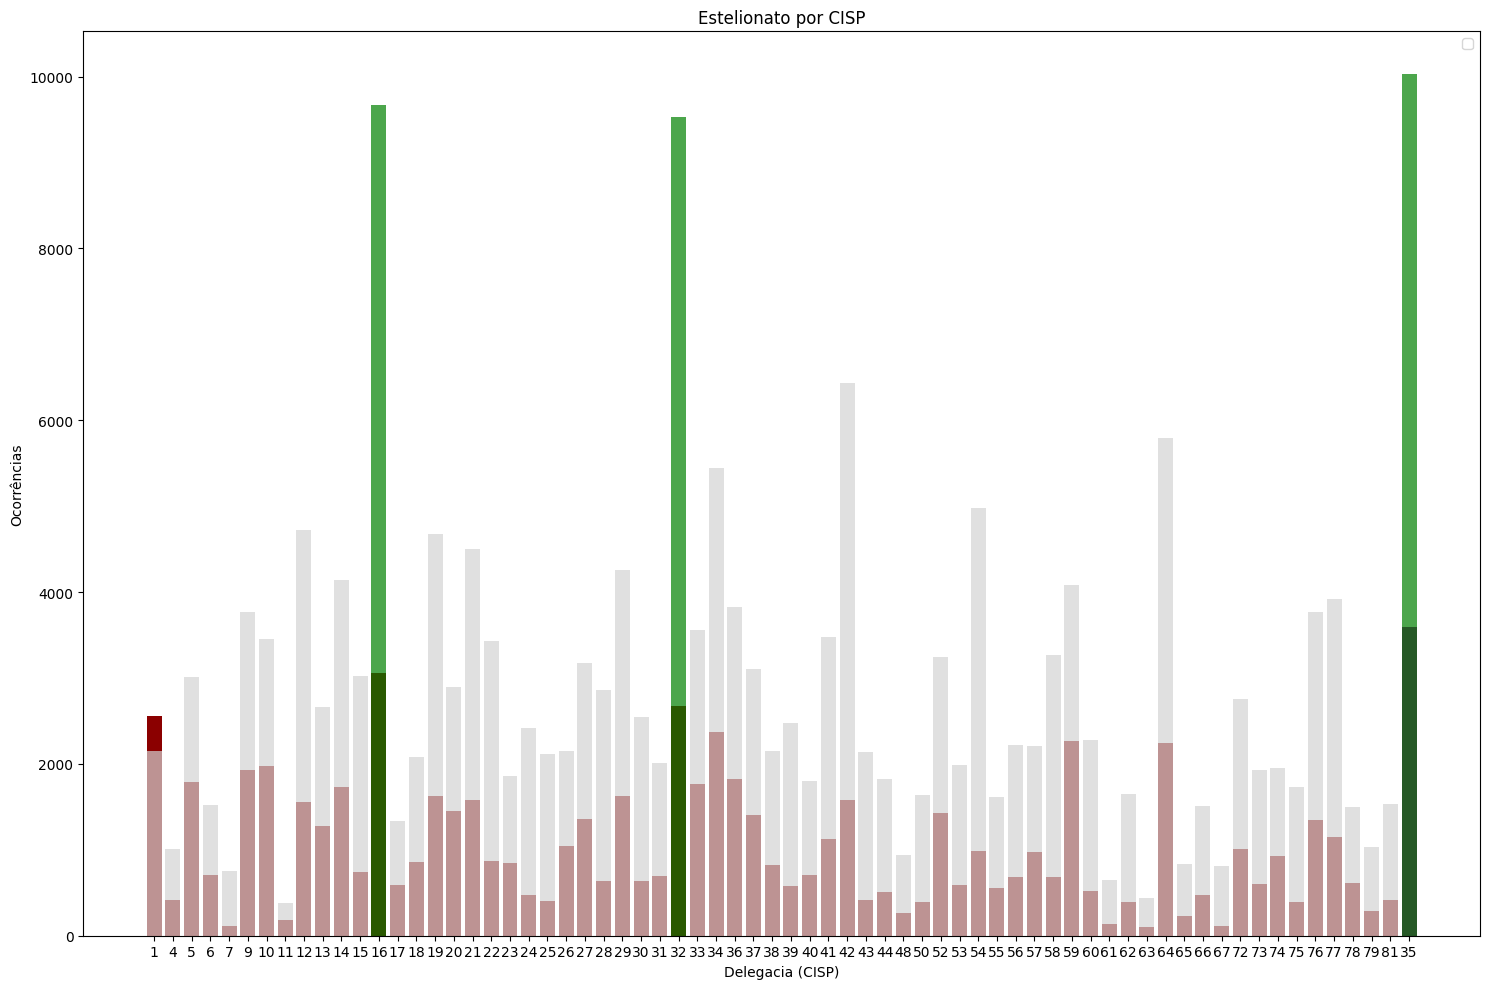

In [ ]:
# Converter a coluna 'ano' para numérica
BaseDP['ano'] = pd.to_numeric(BaseDP['ano'], errors='coerce')


gestao_atual = BaseDP[BaseDP['ano'].isin([2023, 2024])].copy()
gestao_anterior = BaseDP[BaseDP['ano'].isin([2019, 2020])].copy()


gestao_atual_rm = gestao_atual[gestao_atual['munic'].isin(metropolitana)]
gestao_anterior_rm = gestao_anterior[gestao_anterior['munic'].isin(metropolitana)]

grupo_atual = gestao_atual_rm.groupby('cisp')['estelionato'].sum().reset_index()
grupo_anterior = gestao_anterior_rm.groupby('cisp')['estelionato'].sum().reset_index()

# Estatísticas gestão atual
valores_atual = np.array(grupo_atual['estelionato'])
q1_atual = np.percentile(valores_atual, 25)
q3_atual = np.percentile(valores_atual, 75)
iqr_atual = q3_atual - q1_atual
limite_inferior_atual = q1_atual - 1.5 * iqr_atual
limite_superior_atual = q3_atual + 1.5 * iqr_atual
media_atual = np.mean(valores_atual)
mediana_atual = np.median(valores_atual)
distancia_atual = (media_atual - mediana_atual) / mediana_atual
print(f'Distância entre média e mediana (gestão atual): {distancia_atual * 100:.2f}%')

# Estatísticas gestão anterior
valores_anterior = np.array(grupo_anterior['estelionato'])
q1_anterior = np.percentile(valores_anterior, 25)
q3_anterior = np.percentile(valores_anterior, 75)
iqr_anterior = q3_anterior - q1_anterior
limite_inferior_anterior = q1_anterior - 1.5 * iqr_anterior
limite_superior_anterior = q3_anterior + 1.5 * iqr_anterior
media_anterior = np.mean(valores_anterior)
mediana_anterior = np.median(valores_anterior)
distancia_anterior = (media_anterior - mediana_anterior) / mediana_anterior
print(f'Distância entre média e mediana (gestão anterior): {distancia_anterior * 100:.2f}%')

# Separar dados para cada gestão
outliers_atual = grupo_atual[grupo_atual['estelionato'] > limite_superior_atual]
normais_atual = grupo_atual[grupo_atual['estelionato'] <= limite_superior_atual]

outliers_anterior = grupo_anterior[grupo_anterior['estelionato'] > limite_superior_anterior]
normais_anterior = grupo_anterior[grupo_anterior['estelionato'] <= limite_superior_anterior]


plt.figure(figsize=(15, 10))
# Gestão anterior
plt.bar(normais_anterior['cisp'].astype(str), normais_anterior['estelionato'], color='darkred')
plt.bar(outliers_anterior['cisp'].astype(str), outliers_anterior['estelionato'], color='purple')
# Gestão atual
plt.bar(normais_atual['cisp'].astype(str), normais_atual['estelionato'], color='lightgray', alpha=0.7)
plt.bar(outliers_atual['cisp'].astype(str), outliers_atual['estelionato'], color='green', alpha=0.7)
plt.title('Estelionato por CISP')
plt.xlabel('Delegacia')
plt.ylabel('Ocorrências')
plt.legend()
plt.tight_layout()
plt.show()